In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import math

%matplotlib inline

In [3]:
def load_dataset():
    train_dataset = h5py.File('catnotcat_dataset/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('catnotcat_dataset/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
#Loading the cat not cat data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

cat


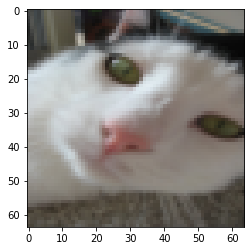

In [121]:
#Look at the dataset
index = 14
plt.imshow(train_set_x_orig[index])
print(classes[np.squeeze(train_set_y[:, index])].decode('utf-8')) # classes is of type numpy.ndarray with values 'cat' & 'non-cat'

In [16]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [17]:
test_set_x_orig.shape

(50, 64, 64, 3)

There are 209 training pictures and 50 pictures for testing. Images are of size(64*64)

**Now**
Reshape the image of shape(64,64,3) to **numpy**-array of shape(64*64*3,1)

In [29]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T

In [30]:
train_set_x_flatten.shape

(12288, 209)

In [31]:
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [32]:
test_set_x_flatten.shape

(12288, 50)

Standardizing the data

In [33]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [35]:
train_set_x_flatten[0:5, 0]

array([17, 31, 56, 22, 33], dtype=uint8)

In [36]:
train_set_x[0:5, 0]

array([0.06666667, 0.12156863, 0.21960784, 0.08627451, 0.12941176])

In [63]:
#Activation Function
def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    return s

Function to initialize w,b 

In [64]:
def initialize_parameters(dims):
    w = np.zeros([dims, 1])
    b = 0
    return w,b

After initializing parameters we need to do forward and backward propagation steps for learning the parameters

In [81]:
def propagate(w, b, X, Y):
    m = X.shape[1] # This is the number of training expamples we have
    
    #forward propagation
    #this is the result of the neuron which is also an activation
    A = sigmoid(np.dot(w.T, X)+b)
    #now calculate the cost
    cost = - (np.sum((Y*np.log(A))+ (1-Y)*np.log(1-A)))/m
    
    #backward propagation
    dw = np.dot(X, (A-Y).T)/m
    db = np.sum(A-Y)/m
    
    grads = {'dw': dw,
             'db':db}
    cost = np.squeeze(cost)
    return grads, cost

We have done propagation and after getting the gradients it's time to update the parameters

In [82]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs=[]
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i%100 == 0:
            costs.append(cost)
            
        if print_cost and i%100 == 0:
            print('Cost after iteartion %i: %f'%(i,cost))
            
    params = {'w':w,
              'b':b}
    
    grads = {'dw':dw,
             'db':db}
    
    return params, grads, costs

The parameters **w** & **b** have been optimized by optimize function and we can use these parameters to predict 

In [83]:
def predict(w, b, X):
    
    m = X.shape[1] # number of examples to predict
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T, X)+b) #this will calculate the probability of cat
    
    for i in range(A.shape[1]):
        #converting the probability to 0/1
        p = lambda x: 0 if x<=0.5 else 1
        Y_prediction[0][i] = p(A[0][i])
        
    return Y_prediction
        

Finally it's time to merge all the functions into a model

In [84]:
def model(X_train, Y_train, X_test, Y_test, num_iterations= 2000, learning_rate = 0.5, print_cost=False):
    
    #initialize parameters with zero
    w,b = initialize_parameters(X_train.shape[0])
    
    #gradient descent
    parameters, grads, cost = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters['w']
    b = parameters['b']
    
    #predict test
    Y_predict_test = predict(w, b, X_test)
    
    print('test accuracy: {}%'.format(100 - np.mean(np.abs(Y_predict_test - Y_test))*100))
    
    d = {'costs': cost,
         'Y_predict_test': Y_predict_test,
         'w':w,
         'b':b,
         'learning_rate': learning_rate,
         'num_iterations': num_iterations}
    
    return d

In [86]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteartion 0: 0.693147
Cost after iteartion 100: 0.584508
Cost after iteartion 200: 0.466949
Cost after iteartion 300: 0.376007
Cost after iteartion 400: 0.331463
Cost after iteartion 500: 0.303273
Cost after iteartion 600: 0.279880
Cost after iteartion 700: 0.260042
Cost after iteartion 800: 0.242941
Cost after iteartion 900: 0.228004
Cost after iteartion 1000: 0.214820
Cost after iteartion 1100: 0.203078
Cost after iteartion 1200: 0.192544
Cost after iteartion 1300: 0.183033
Cost after iteartion 1400: 0.174399
Cost after iteartion 1500: 0.166521
Cost after iteartion 1600: 0.159305
Cost after iteartion 1700: 0.152667
Cost after iteartion 1800: 0.146542
Cost after iteartion 1900: 0.140872
test accuracy: 70.0%


Test Accuracy comes around 70 percent. Great!

This is: 1
Prediction is: 0.0


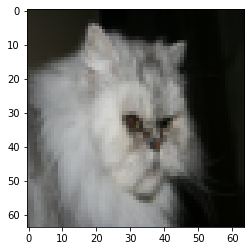

In [112]:
#Let's see the prediction
index = 10
plt.imshow(test_set_x[:,index].reshape((test_set_x_orig.shape[1], test_set_x_orig.shape[1], 3)))
print('This is: '+ str(test_set_y[0,index]))
print('Prediction is: '+ str(d['Y_predict_test'][0,index]))
#print('Prediction is: '+classes[d['Y_predict_test'][0,index]].decode('utf-8'))

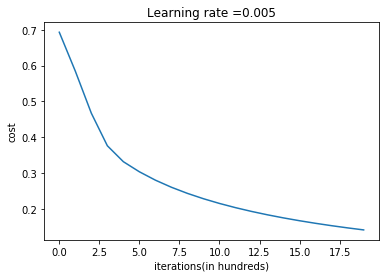

In [113]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(in hundreds)')
plt.title('Learning rate ='+str(d['learning_rate']))
plt.show()

learning rate is: 0.01
test accuracy: 70.0%
-*-*-*-*-*-*-*-
learning rate is: 0.005
test accuracy: 70.0%
-*-*-*-*-*-*-*-
learning rate is: 0.001
test accuracy: 68.0%
-*-*-*-*-*-*-*-
learning rate is: 0.0005
test accuracy: 62.0%
-*-*-*-*-*-*-*-


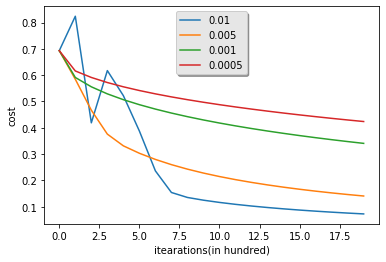

In [116]:
#Further analysis
learning_rates = [0.01, 0.005, 0.001, 0.0005]
models={}
for i in learning_rates:
    print('learning rate is: '+ str(i))
    models[str(i)] = d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = i, print_cost = False)
    print('-*-*-*-*-*-*-*-')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['costs']), label= str(models[str(i)]['learning_rate']))
plt.ylabel('cost')
plt.xlabel('itearations(in hundred)')

legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()